# Rotor Point Cloud

In [4]:
%matplotlib widget
import os
from pathlib import Path
import sys
sys.path.append(str(Path(os.getcwd()).parent.parent))
from src.utils import print_code, rotor_point_spacing, generate_turbine
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML
# from utils import print_code, rotor_point_spacing, generate_turbine

In [5]:
HTML(print_code(rotor_point_spacing))

In [6]:
HTML(print_code(generate_turbine))

In [7]:
diameter = 100
grid_element_size = np.array([10, 10, 10], dtype = float)
n_vector = np.array([1, 0.5])
turbine_cord = np.array([12, 543, 234])
angle = np.deg2rad(45)
r_list, n_angle = rotor_point_spacing(diameter, grid_element_size, angle)
points = generate_turbine(r_list, n_angle, n_vector, turbine_cord)

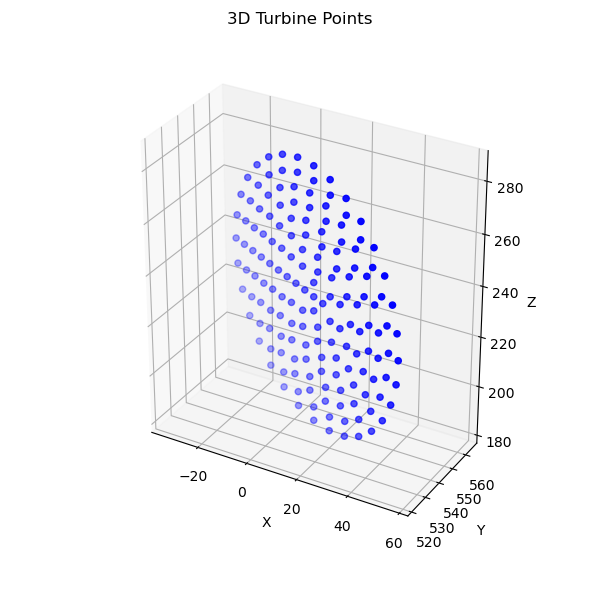

In [8]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(6, 6))
ax.scatter(*points.T, color='b', marker='o')
ax.set(xlabel= "X",
       ylabel = "Y",
       zlabel = "Z",
       aspect = "equal")
fig.suptitle('3D Turbine Points')
plt.show()

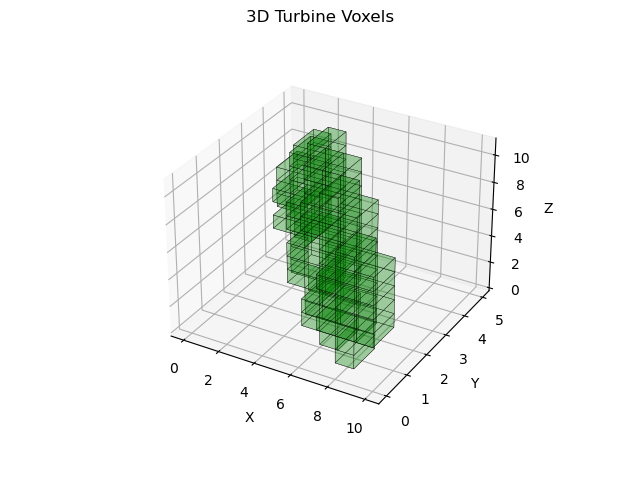

In [9]:
voxel_indices = np.floor(points / grid_element_size).astype(int)
voxel_indices = np.unique(voxel_indices, axis=0)
min_values = np.min(voxel_indices, axis=0) # Find the minimum value along each column (axis=0)
shifted_indices = voxel_indices - min_values # Add the absolute minimum value to shift all elements in each column
grid_dim = np.max(shifted_indices, axis=0) + 1 # Define grid dimensions based on the shifted indices
occupied_grid = np.zeros(grid_dim, dtype=bool) # Create an empty grid to represent the occupied voxels
occupied_grid[shifted_indices[:, 0], shifted_indices[:, 1], shifted_indices[:, 2]] = True # Mark the occupied voxels in the grid

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.voxels(occupied_grid, color = "green", edgecolor='k', linewidth=0.2, alpha = 0.2)

ax.set(xlabel= "X",
       ylabel = "Y",
       zlabel = "Z")
fig.suptitle('3D Turbine Voxels')
plt.show()

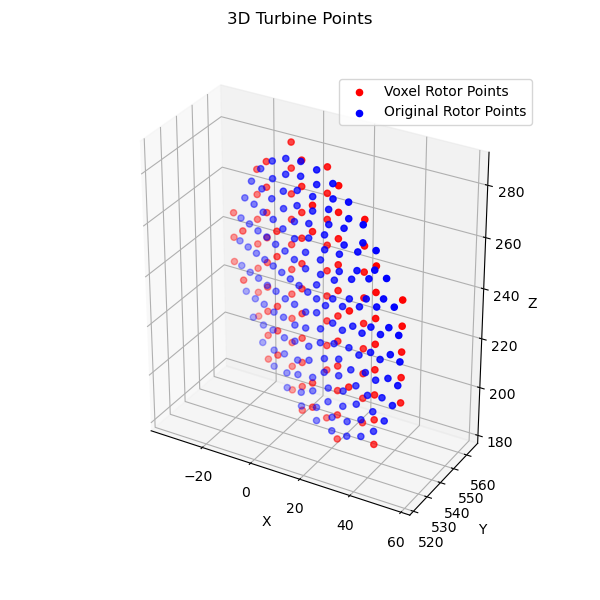

In [10]:
turbine_points = (voxel_indices+np.array([0.5, 0.5, 0.5])) * grid_element_size

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(6, 6))
ax.scatter(*turbine_points.T, color='r', marker='o', label = "Voxel Rotor Points")
ax.scatter(*points.T, color='b', marker='o', label = "Original Rotor Points")
ax.set(xlabel= "X",
       ylabel = "Y",
       zlabel = "Z",
       aspect = "equal")
ax.legend()
fig.suptitle('3D Turbine Points')
plt.show()

In [13]:
import ipywidgets as widgets
widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)


IntSlider(value=7, continuous_update=False, description='Test:', max=10)

In [14]:
tab_contents = ['P0', 'P1', 'P2', 'P3', 'P4']
children = [widgets.Text(description=name) for name in tab_contents]
tab = widgets.Tab()
tab.children = children
for ii in range(len(children)):
    tab.set_title(ii, f"tab_{ii}")
tab